Original blog post at: http://kldavenport.com

Me: https://twitter.com/KevinLDavenport

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
from scipy import stats
import seaborn as sns

from pylab import rcParams

/Users/balthasar/anaconda3/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Loading and Transforming the Data
Let's inspect the composition of our source data.

_blah_

In [2]:
%%timeit
x = np.array([2,2,2])

The slowest run took 31.16 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.22 µs per loop


In [262]:
%%bash 
head -n 3 data/historic_euro_hrs_worked.csv

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Belgium,1896,1737,1733,1757,1763,1769,1751,1709,1725,1738,1752,1719,1765,1768,1767,1765
Bulgaria,N.a.,N.a.,N.a.,2005,2006,1964,2007,1997,2000,1989,1978,1913,1976,1972,1955,1954


The original document specifies missing or NA values as 'N.a.'. Rather than replacing these values with `df.replace()` after loading the dataframe, `read_csv` provides a parameter for replacing specific strings with true NaN values on load.

In [5]:
df = pd.read_csv('data/historic_euro_hrs_worked.csv',  na_values='N.a.', index_col= 0 )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Belgium to UK
Data columns (total 16 columns):
1998    24 non-null float64
1999    24 non-null float64
2000    26 non-null float64
2001    27 non-null float64
2002    28 non-null object
2003    28 non-null int64
2004    28 non-null int64
2005    28 non-null int64
2006    28 non-null int64
2007    28 non-null int64
2008    28 non-null int64
2009    28 non-null int64
2010    28 non-null int64
2011    28 non-null int64
2012    28 non-null int64
2013    28 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 3.7+ KB


In [9]:
df.head(5)

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Belgium,1896.0,1737.0,1733.0,1757.0,1763,1769,1751,1709,1725,1738,1752,1719,1765,1768,1767,1765
Bulgaria,NaN,NaN,NaN,2005.0,2006,1964,2007,1997,2000,1989,1978,1913,1976,1972,1955,1954
Czech Republic,2124.0,2157.0,2128.0,2029.0,1984,1971,2029,1959,1961,1954,1967,1926,1936,1912,1898,1881
Denmark,1646.0,1783.0,1666.0,1709.0,1776,1713,1710,1719,1702,1708,1711,1692,1730,1750,1743,1744
Germany,2026.0,2028.0,2017.0,2023.0,2026,2003,2003,1953,1974,1959,1945,1879,1904,1886,1863,1847


Since version .15 Pandas has included memory usage in `df.info`. We can specify `verbose=False` if we don't need column descriptions.

In [10]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Belgium to UK
Columns: 16 entries, 1998 to 2013
dtypes: float64(4), int64(11), object(1)
memory usage: 3.7+ KB


Now let's take a look at some summary statistics with the `describe()` method.

In [11]:
df.describe()

,1998,1999,2000,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,24.000000,24.000000,26.000000,27.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,1969.583333,1979.375000,1962.461538,1938.370370,1926.178571,1934.285714,1898.857143,1892.321429,1891.357143,1882.035714,1854.857143,1874.107143,1874.892857,1868.107143,1862.571429
std,131.329627,124.765802,136.295042,133.832889,139.376669,136.029370,136.960312,131.068841,127.115641,122.631783,117.888433,109.010478,107.642185,106.880459,105.851198
min,1646.000000,1716.000000,1666.000000,1657.000000,1643.000000,1685.000000,1661.000000,1660.000000,1659.000000,1672.000000,1632.000000,1670.000000,1667.000000,1658.000000,1648.000000
25%,1911.000000,1939.250000,1922.750000,1871.500000,1857.750000,1860.500000,1797.500000,1809.250000,1801.500000,1797.000000,1784.250000,1797.750000,1806.000000,1801.750000,1809.500000
50%,1978.500000,1989.500000,1973.000000,1965.000000,1952.500000,1953.500000,1898.500000,1898.500000,1893.000000,1897.500000,1869.500000,1890.500000,1879.000000,1878.000000,1864.000000
75%,2046.000000,2056.000000,2032.250000,2017.500000,2016.000000,2041.000000,2009.000000,1997.000000,1989.250000,1980.500000,1931.250000,1952.250000,1962.750000,1955.750000,1937.000000
max,2195.000000,2199.000000,2217.000000,2198.000000,2189.000000,2154.000000,2144.000000,2114.000000,2121.000000,2112.000000,2091.000000,2095.000000,2103.000000,2103.000000,2099.000000


At first glance it looks like the average time worked per year is descreasing overtime. Let's examine how the aggregate average mean of the EU has changed over time. 

/Users/balthasar/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


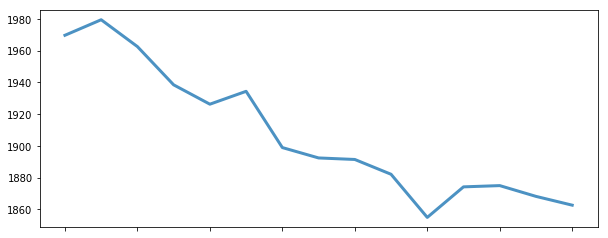

In [12]:
df.describe().ix[1].plot(figsize=(10, 4), linewidth=3, alpha =.8)

Since we're working with time series data we might prefer to transform the data from wide format to long. We'll want the dates to be the index for the given observations so we can simply transpose the dataframe with `df.T`. Inline with Pandas' excellent syntax this instance method is similar to numpy.ndarray.T which is the same as self.transpose().

In [13]:
df = df.T
df = df.convert_objects(convert_numeric=True)

/Users/balthasar/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [14]:
df.head(5)

,Belgium,Bulgaria,Czech Republic,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,The Netherlands,Austria,Poland,Portugal,Romania,Slovania,Slovak Republic,Finland,Sweden,UK
1998,1896.0,NaN,2124.0,1646.0,2026.0,2055.0,1981.0,2021.0,1935.0,1915.0,...,1875.0,1952.0,2177.0,1976.0,2104.0,1899.0,2059.0,1772.0,1721.0,1965.0
1999,1737.0,NaN,2157.0,1783.0,2028.0,2026.0,1979.0,2056.0,2001.0,1950.0,...,1863.0,1986.0,2152.0,2012.0,2099.0,1954.0,2056.0,1716.0,1842.0,1960.0
2000,1733.0,NaN,2128.0,1666.0,2017.0,1974.0,1972.0,2065.0,1940.0,1864.0,...,1846.0,1980.0,2033.0,1954.0,2143.0,1918.0,2053.0,1675.0,1839.0,1940.0
2001,1757.0,2005.0,2029.0,1709.0,2023.0,2005.0,1965.0,2043.0,1934.0,1870.0,...,1861.0,1991.0,2012.0,1960.0,2148.0,1873.0,2052.0,1657.0,1674.0,1944.0
2002,1763.0,2006.0,1984.0,1776.0,2026.0,2058.0,1938.0,2059.0,1952.0,1842.0,...,1756.0,1982.0,2040.0,1936.0,2167.0,1906.0,2036.0,1686.0,1693.0,1939.0


### Examining Relationships with Plotting

Let's take a look at Germany, UK, and France vs the [PIIGS](http://en.wikipedia.org/wiki/PIGS_%28economics%29). Seaborn makes it easy to set palettes from [colorbrewer](http://colorbrewer2.org/). Note that I append a standard matplotlib method to Panda's `plot()` helper function to set the legend size below.

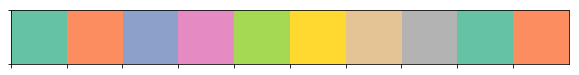

In [15]:
sns.set_palette("Set2", 10, 1)
sns.palplot(sns.color_palette("Set2", 10,1))

/Users/balthasar/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


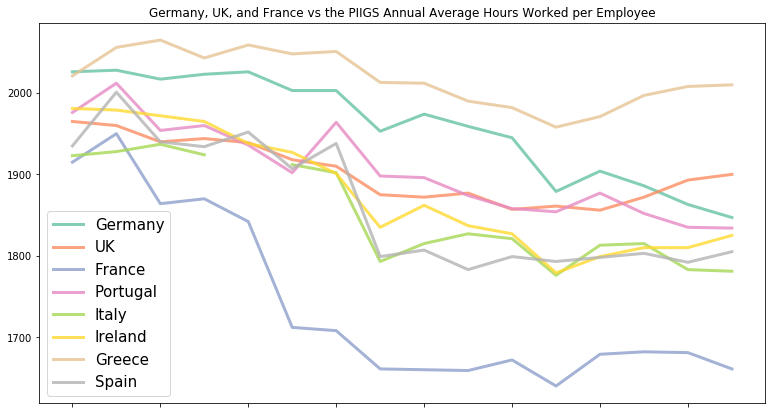

In [16]:
guf_vs_piigs = ['Germany', 'UK', 'France','Portugal', 'Italy', 'Ireland', 'Greece', 'Spain']
df.ix[:, guf_vs_piigs].plot(figsize=(13, 7),
                            linewidth=3,
                            alpha =.8,
                            title = "Germany, UK, and France vs the PIIGS Annual Average Hours Worked per Employee").legend(loc=3,prop={'size':15})

Note that the decline in hours worked deaccelerates around 2005 for all countries except Germany.
Now what if we want to examine all time series plots at once to quickly examine countries with the most drastic change? Note the assignment to supress in order to supress the matplotlib inline rendering messages (e.g. `<matplotlib.axes._subplots.AxesSubplot at 0x10bb579d0>`)


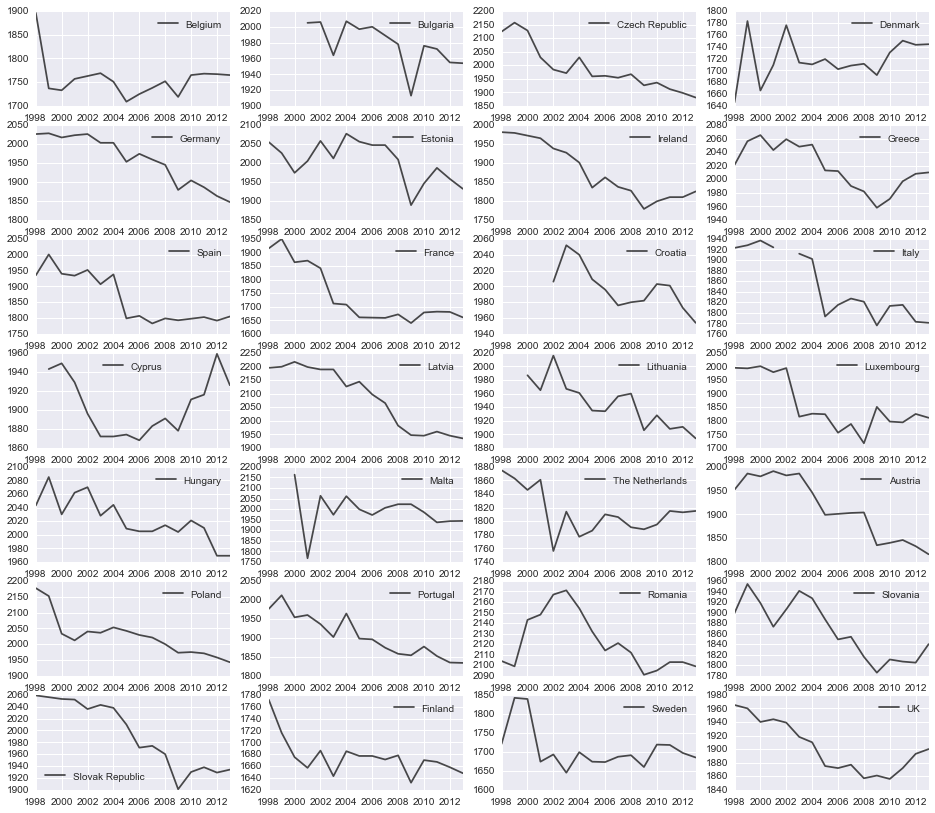

In [214]:
supress = df.plot(subplots=True, layout=(8, 4), figsize=(16, 16,), sharex=False, alpha =.7)

It might be interesting to look at a correlation matrix to reveal relationships between the countries.

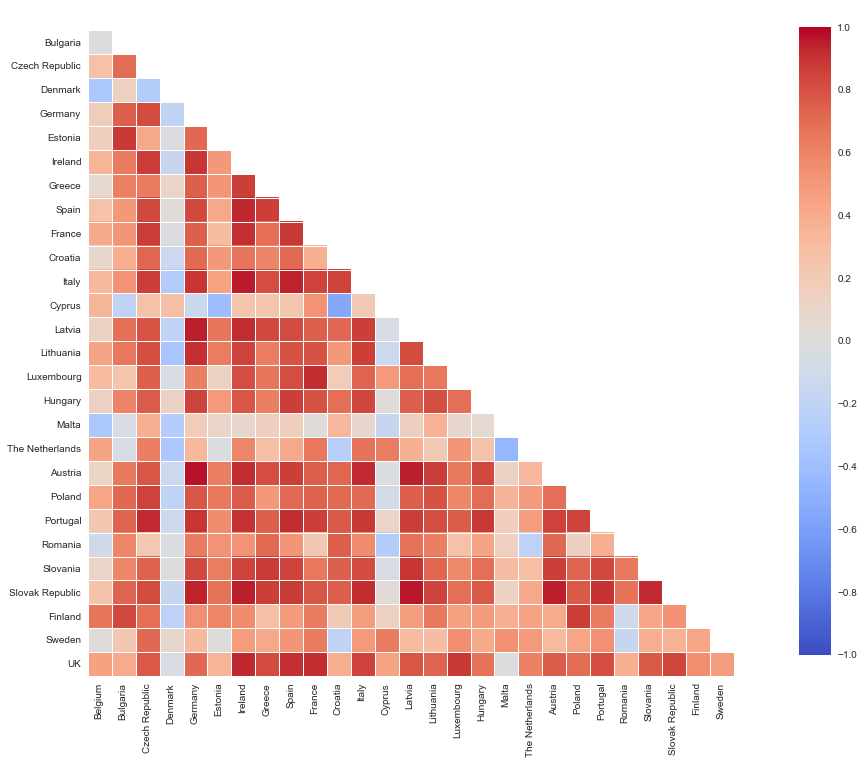

In [215]:
plt.rcParams['figure.figsize'] = 15, 15

supress = sns.corrplot(df, annot=False, sig_stars=False,
             diag_names=False, cmap="coolwarm")

The correlation matrix indicates that Denmark is going against the trend as it rarely correlates with other countries (lots of blue), just as the line plot indicated above. Another interesting summary statistic might be the sum of total percentage change per country which indicates what country had the most drastic change to date. Luckily Pandas has an instance method for that.

In [216]:
pct_change_sum = df.pct_change().sum()
pct_change_sum.sort() # inplace method default
print 'Absolute Mean Percentage Change: ' + str(pct_change_sum.abs().mean())
print ''
print pct_change_sum

Absolute Mean Percentage Change: 0.0603916775238

France            -0.137442
Latvia            -0.124114
Czech Republic    -0.118457
Poland            -0.111631
Germany           -0.091152
Luxembourg        -0.087165
Ireland           -0.080509
Italy             -0.074149
Portugal          -0.072338
Malta             -0.071814
Austria           -0.070783
Finland           -0.070174
Belgium           -0.066778
Spain             -0.065156
Slovak Republic   -0.061676
Lithuania         -0.060430
Estonia           -0.057099
Hungary           -0.035527
UK                -0.033165
The Netherlands   -0.029818
Slovania          -0.029289
Croatia           -0.025596
Bulgaria          -0.024140
Sweden            -0.012458
Cyprus            -0.007883
Greece            -0.004757
Romania           -0.001922
Denmark            0.065546
dtype: float64


Compared to the mean absolute percentage change of 0.06, France is clearly leading the EU in reducing hours worked from 1998 - 2013. Conversely Denmark stands alone in increasing hours worked.

### Statistical Methods

Let's explore the relationship between time and unemployment using France's data and linear regression. If you're unfamiliar with concepts behind linear regression check out this [link](http://ipython-books.github.io/featured-04/). This is meant to be a short intro so we won't explore how to tune a fit and make better approximations of the underlying distribution of the data.

In [17]:
df["France"]

1998    1915.0
1999    1950.0
2000    1864.0
2001    1870.0
2002    1842.0
2003    1712.0
2004    1708.0
2005    1661.0
2006    1660.0
2007    1659.0
2008    1672.0
2009    1640.0
2010    1679.0
2011    1682.0
2012    1681.0
2013    1661.0
Name: France, dtype: float64

In [219]:
known_x = np.arange(len(df.France)) # Create the index
known_y = df.France # Return a pandas series from a df object

# Find the polynomial coefficients
linear_coef = np.polyfit(known_x, known_y, 1)

# Pass polynomial coefficients to poly1d convenience function (highest power 1st)
linear_poly = np.poly1d(linear_coef)

NumPy's poly1d function allows you to pass a future unkown time index, or whatever type of x value you fit on, to return a y value.

For example we fit on `known_x = np.arange(len(df.France))` which contained 16 elements (1998-2013). Below we use our `linear_poly` to see what the annual average hours worked per employee might look like in 2020:

In [220]:
linear_poly(23)

1449.4632352941185

We can also construct a quadratic fit with the same methods except we pass `2` to denote the degree.

In [221]:
a,b = linear_poly.coeffs # slope, intercept

quadratic_coef = np.polyfit(known_x, known_y, 2)
quadratic_poly = np.poly1d(quadratic_coef)

Below we plot our simple linear regression and quadratic models:

Linear Regression
slope: -18.8088235294 intercept: 1882.06617647


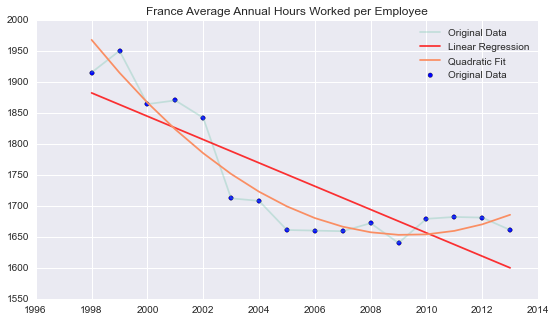

In [222]:
known_x_labels = np.array(list(df.index)) # For x-axis labeling 
plt.rcParams['figure.figsize'] = 9, 5
plt.scatter(known_x_labels, known_y, label = 'Original Data')
plt.plot(known_x_labels,known_y, alpha = .3, label = 'Original Data')
plt.plot(known_x_labels, linear_poly(known_x), 'r', alpha=.8, label='Linear Regression') # y = a + bx or y = mx + b 
plt.plot(known_x_labels, quadratic_poly(known_x), '-', label='Quadratic Fit') # y = ax^2 + bx + c
plt.title('France Average Annual Hours Worked per Employee')
plt.legend()

print 'Linear Regression'
print 'slope: %s' % a, 'intercept: %s' % b

###Imputation (filling missing data)

When we have abundant data we might not think twice about discarding incomplete or missing observations for any given index. Depending on the work at hand and the size of the dataset, the practice of discarding NaNs may introduce some unforeseen bias. We might decouple some trend or miss an element of cyclically or seasonality. In essence imputation allows us to preserve all cases by replacing missing data with a probable value based on other available information. The practice of imputation goes much deeper when you start using simulations and probabilistic models.


We've been working with a complete and vetted dataset so far. What should we do when the time-series data we're working with is incomplete? Let's say the governing body of this study was unable to collect data for some set of years. Here is the current complete set:

In [223]:
df.France

1998    1915
1999    1950
2000    1864
2001    1870
2002    1842
2003    1712
2004    1708
2005    1661
2006    1660
2007    1659
2008    1672
2009    1640
2010    1679
2011    1682
2012    1681
2013    1661
Name: France, dtype: float64

And here is the data with 2004, 2010, 2011 employment data missing (NaN):

In [224]:
France_incomplete  = df.France.copy()

France_incomplete[['2004','2010','2011']] = np.NaN
France_incomplete

1998    1915
1999    1950
2000    1864
2001    1870
2002    1842
2003    1712
2004     NaN
2005    1661
2006    1660
2007    1659
2008    1672
2009    1640
2010     NaN
2011     NaN
2012    1681
2013    1661
Name: France, dtype: float64

With imputation, we have a large array of methods to employ depending on the requirements of what analysis we intend to do with the data. Are we cleaning up the data for ploting purposes to demonstrate a simple point or are we planning to use the data to describe the directionality of an equity?

Since this is one-dimensional data we could naively fill these values with the mean of the entire column. This might work okay for a larger set of time-series data with no clear trend and intermittent dispersed NaNs.

For exampe:

In [225]:
France_incomplete.fillna(value = France_incomplete.mean())

1998    1915.000000
1999    1950.000000
2000    1864.000000
2001    1870.000000
2002    1842.000000
2003    1712.000000
2004    1752.846154
2005    1661.000000
2006    1660.000000
2007    1659.000000
2008    1672.000000
2009    1640.000000
2010    1752.846154
2011    1752.846154
2012    1681.000000
2013    1661.000000
Name: France, dtype: float64

This might make for a bad method given that two of the two values are next to each other so we might flat line the momentum that the series had. What if we carry forward the last known value using the forward-fill method in Pandas?

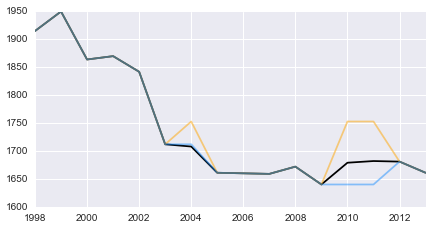

In [226]:
plt.rcParams['figure.figsize'] = 7, 3.5

# Original data
df.France.plot(color = 'black')
# Using the mean
France_incomplete.fillna(value = France_incomplete.mean()).plot(color = 'orange',alpha = .5)
# Filling forward
France_incomplete.fillna(method= 'ffill').plot(color = 'dodgerblue',alpha = .5)

In the simple case we see that forward-filling more closely resembles the original complete data. `nafill` also provides {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’}. Check out the official documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

###Trend Extrapolation

Trend Extrapolation is a forecasting technique which uses methods such as exponential smoothing or moving averages to project the future pattern of a time series data. Forecasting is very hard and at times you have to walk a fine line between overfitting some set of data with a higher order polynomial and producing non-practical (or non-sensical) results with ARIMA. 

Let's go over some practical and easy to implement forecasting methods below using the entire EU dataset and extrapolate it out to 2020 with basic linear regression.

In [250]:
colnames = [colname for colname in df.columns]

# 1998 - 2013
years_into_future = 7
known_x = np.arange(df.shape[0]) # Current time interval
new_x = np.arange(len(known_x), len(known_x) + years_into_future, 1) # 7 years into future
concat_x = np.concatenate((known_x, new_x),axis=0)

out = np.empty(shape=(concat_x.shape[0], len(colnames)), dtype=float) # Empty faster than zero

# Return tuple of index and value
for col_index in enumerate(colnames):
    known_y = df.iloc[:,col_index[0]]
    known_y = known_y.fillna(value=known_y.mean())
    
    linear_coef = np.polyfit(known_x, known_y, 1)
    linear_poly = np.poly1d(linear_coef)

    new_y = linear_poly(new_x)   
    #new_y = new_y[::-1] # Reverse projections
    
    concat_y = np.concatenate((known_y,new_y),axis=0)
    out[:, col_index[0]] = concat_y

extended_df = pd.DataFrame(out)
extended_df.columns = colnames


extended_df.index = pd.date_range(start = '1998',
                                  end = '2021',
                                  freq='A')

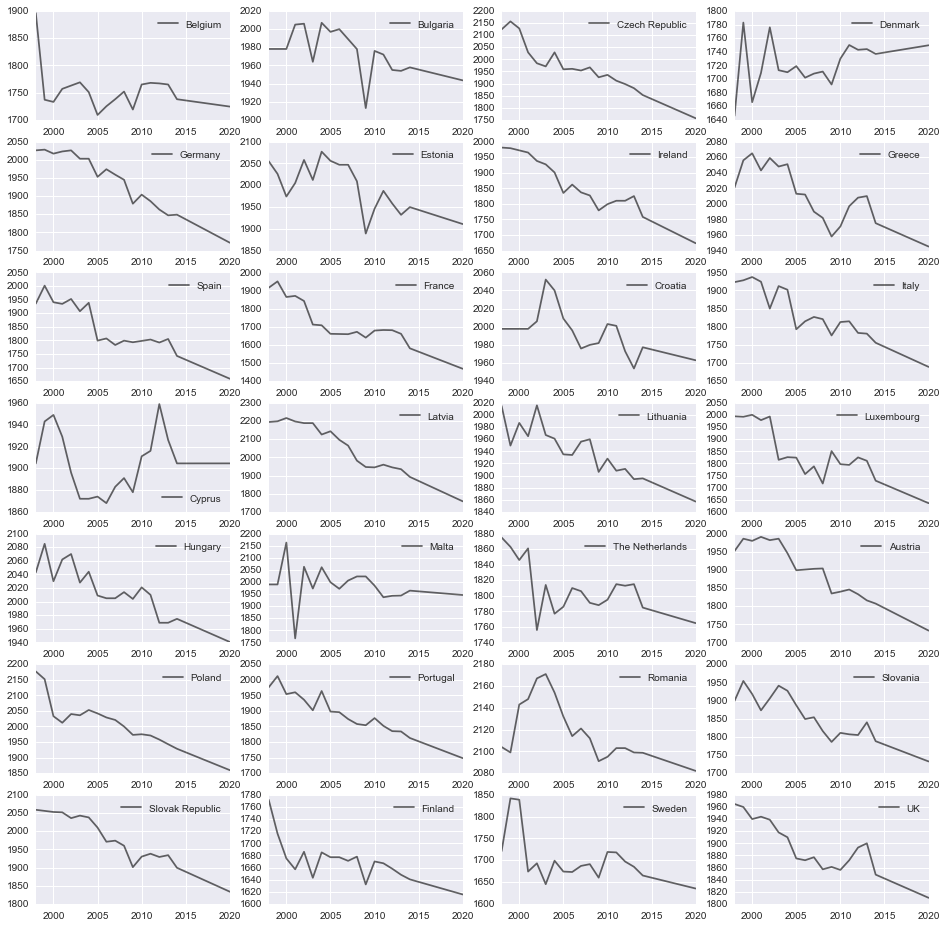

In [251]:
supress = extended_df.plot(subplots=True, layout=(7, 4), figsize=(16, 16), alpha =.6, sharex=False);

Above we see the simple straight line projection to 2020. Again we can change the polynomial degree number in the polyfit function above or replace the new value generator with something more robust.

What if we have some domain knowledge that won't be reflected in the current data or trend? For example, what if I have insider knowledge of a bizarre policy that will be enacted by the EU to increase annual hours worked by employees X% by 2020? What might that look like?

I can anchor a point out in the future (2020) based on some simple descriptive statistic like the max value of the current data set plus 1 standard deviation then interpolate all the missing values between 2013 and 2020. An economist would use a more sophisticated growth model of course. I can use one of SciPy's many interpolation methods, which are conveniently called from Pandas, to fill the empty range in a smooth and more "natural" method opposed to a straight linear regression line. 

In [258]:
colnames = [colname for colname in df.columns]

# 1998 - 2013
years_into_future = 7
known_x = np.arange(df.shape[0]) # Current time interval
new_x = np.arange(len(known_x), len(known_x) + years_into_future, 1) # 7 years into future
concat_x = np.concatenate((known_x, new_x),axis=0)

out = np.empty(shape=(concat_x.shape[0], len(colnames)), dtype=float) # Empty faster than zero

# Return tuple of index and value
for col_index in enumerate(colnames):
    known_y = df.iloc[:,col_index[0]]
    known_y = known_y.fillna(value=known_y.mean())
    
    new_y = np.zeros(shape=(len(new_x),))
    new_y[-1] = np.max(known_y) + (np.std(known_y) * 1)
    concat_y = np.concatenate((known_y,new_y),axis=0)
    
    out[:, col_index[0]] = concat_y

extended_df = pd.DataFrame(out)
extended_df.columns = colnames

extended_df.index = pd.date_range(start = '1998',
                                  end = '2021',
                                  freq='A')

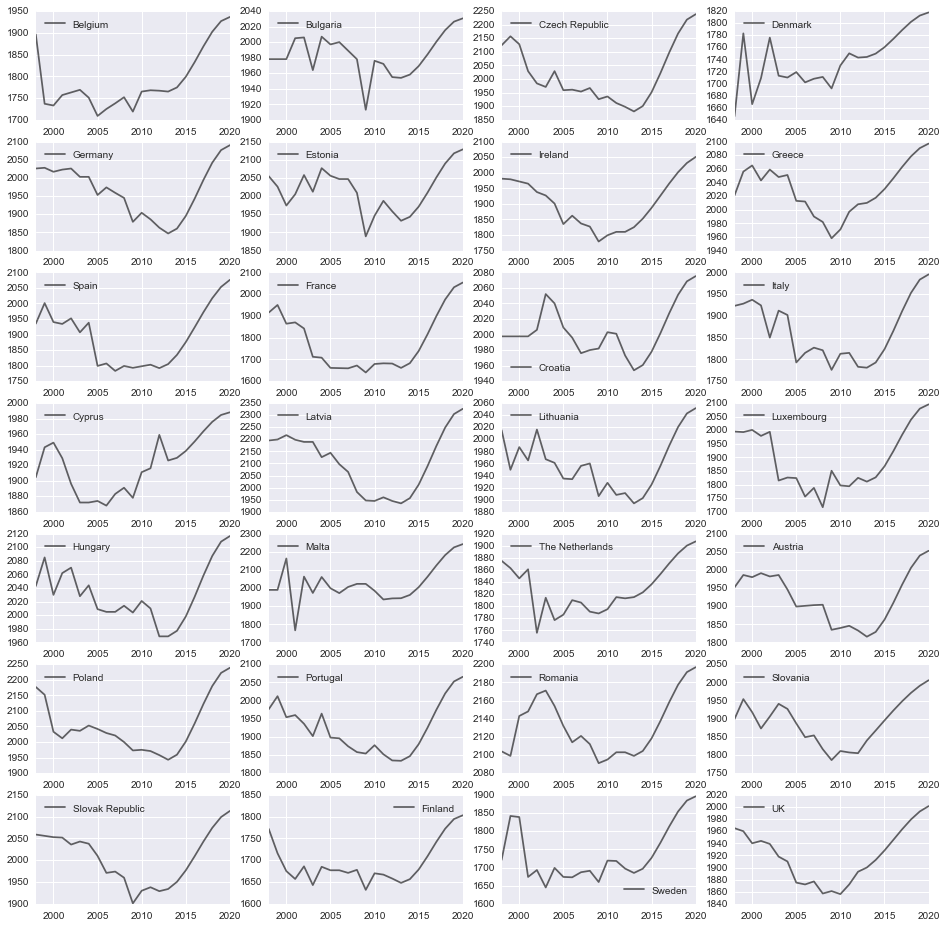

In [259]:
# All the options described here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html
# {‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’,
# ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’ ‘piecewise_polynomial’, ‘pchip’}

extended_df.replace(0, np.nan, inplace=True)

# Must specify order for poly
extended_df.interpolate(method='pchip', axis=0, limit=None, inplace=True, downcast=None)

supress = extended_df.plot(subplots=True, layout=(7, 4), figsize=(16, 16), alpha =.6, sharex=False);

Here's another fun view:

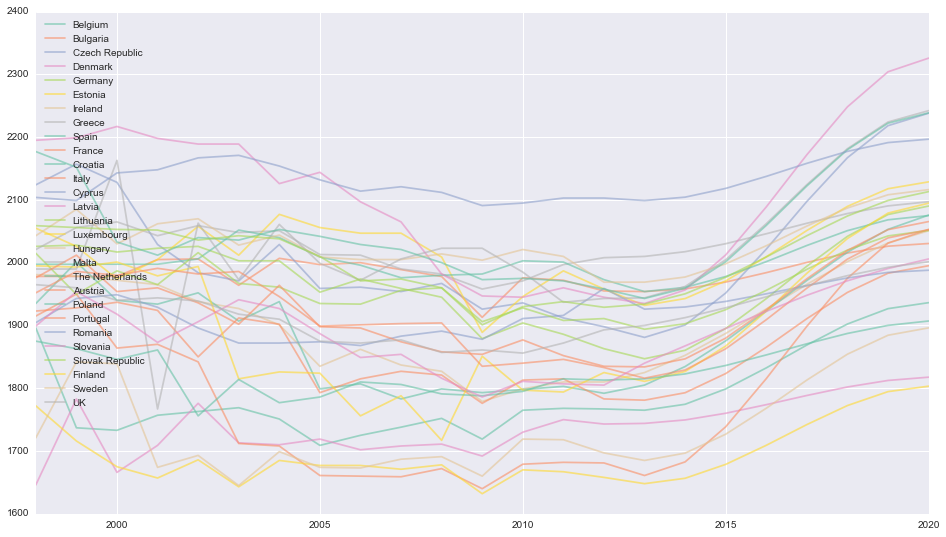

In [260]:
extended_df.plot(figsize=(16, 9), alpha =.6)